# Homework: Python Basics

## Team Name: 
Particle physics 1

## Team Members: 
Josué Imacaña, Pamela Llerena, Nicolás Noriega, Xavier Tintin

## Instructions and initial task:

The purpose of this assignment is to find the characteristic index of the turbulence energy cascade of a snapshot taken from a subsonic turbulence simulation. The spectrum scales, so for simplicity we will work in code units.

You should upload the following simulation file (turbulence_sub_hr.vtk) to your Drive:

https://github.com/ciencialatitud0/EPIC_2/tree/main/Day1/Basics-2/homework/homework_data

**Please work with your team mates and produce a single python notebook per group.** When you finish, ask one of the group members to place the notebook onto the EPIC 2 github repository (we recommend to fork the repository, add the notebook to the Day1/Basics-2/homework/ in your account, and then do a pull request).

To get you started I have added a few lines to open the VTK simulation file and make a plot. First, you should reproduce this on Google Colab.

### Reference: 

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2d_python_II_CFDdata.ipynb

In [ ]:
# First let's mount our Drive folder:

from google.colab import drive
drive.mount('/content/drive')

# To display the contents

!ls "/content/drive/My Drive"

In [ ]:
# Then, we need to install pyvista

!pip install pyvista

In [ ]:
# Import useful libraries

import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Indicate the working directory

input_directory="/content/"
file_name = "turbulence_sub_hr.vtk"

In [ ]:
# Read the mesh

mesh = pv.read(input_directory+file_name)

print(mesh)

In [ ]:
# Now, we read all the scalar and vector quantities

rho = pv.get_array(mesh, "rho", preference = 'cell') # density in code units
vx1 = pv.get_array(mesh, "vx1", preference = 'cell') # x velocity component in code units
vx2 = pv.get_array(mesh, "vx2", preference = 'cell') # y velocity component in code units
Bx1 = pv.get_array(mesh, "Bx1", preference = 'cell') # x magnetic field component in code units
Bx2 = pv.get_array(mesh, "Bx2", preference = 'cell') # y magnetic field component in code units

In [ ]:
# The above arrays are 1D, so we need to make them 2D
# To check you can run: print(rho.shape)

rho_2D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx1_2D = vx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx2_2D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx1_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx2_2D = Bx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

In [ ]:
# Create a 2D grid using metadata information

x = np.linspace(mesh.bounds[0], mesh.bounds[1], mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2], mesh.bounds[3], mesh.dimensions[1] - 1)

X, Y = np.meshgrid(x, y)

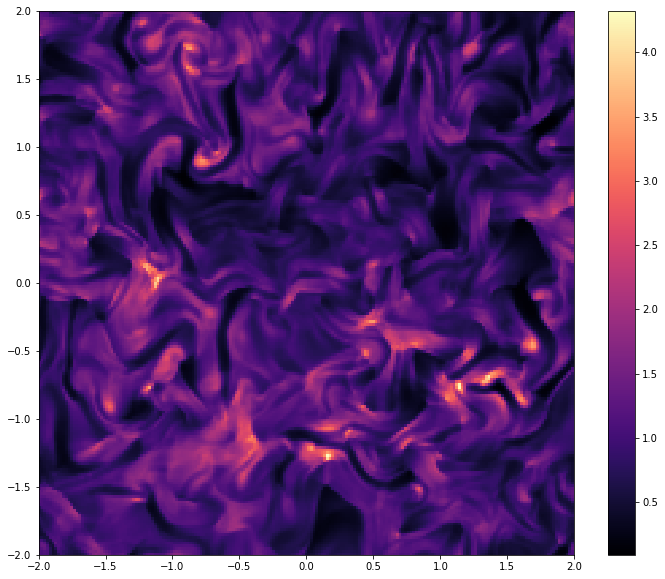

In [ ]:
# And we are ready to interpolate our data onto the mesh:

plt.figure(figsize = (12,10))

Z = plt.pcolor(X, Y, rho_2D, cmap = 'magma')

plt.colorbar(Z)

plt.show()

# TASK 1:

Calculate the kinetic energy density and make a 2D map of it. Recall that:

$E_k =\frac{1}{2}\rho\,v^2$,

so you need to calculate the velocity modulus first:

$v=\sqrt{v_x^2+v_y^2}$.

In [ ]:
#Function to calculate the kinectic energy density

def kinetic_energy(vx1,vx2,rho):
  
  vx=vx1*vx1
  vy=vx2*vx2
  v=np.sqrt(vx+vy)
  Ek=0.5*v*v*rho
  return Ek

kinetic_energy(vx1_2D,vx2_2D,rho_2D)

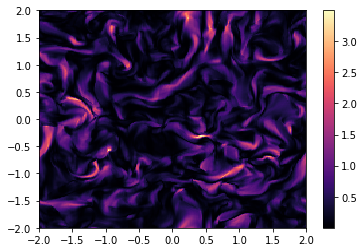

In [ ]:
#2D map

Z = plt.pcolor(X, Y, Ek, cmap = 'magma')
plt.colorbar(Z)
plt.savefig("mapa2D.jpg")

plt.show()

# TASK 2: 

Carry out the 2D Fast Fourier Transform of the kinetic energy image that you produced above, and make a map of it.


### Reference:
https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2b_fourier_transforms.ipynb

In [ ]:
#Fourier transform in 2D, unshifted signal

fourier_Ek = np.fft.fft2(Ek)

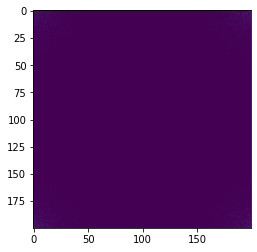

In [ ]:
%matplotlib inline

plt.imshow(np.abs(fourier_Ek))

In [ ]:
d_spacing = 0.001

#Shifted signal
shifted_fourier_Ek = np.fft.fftshift(fourier_Ek)

#Spatial Frequencies
freqs_x = np.fft.fftfreq(Ek.shape[0], d=d_spacing)

freqs_y = np.fft.fftfreq(Ek.shape[1], d=d_spacing)

#norms
norm_fourier_Ek = np.abs(fourier_Ek)
norm_shifted_Ek = np.abs(shifted_fourier_Ek)

# Creating mesh:

freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

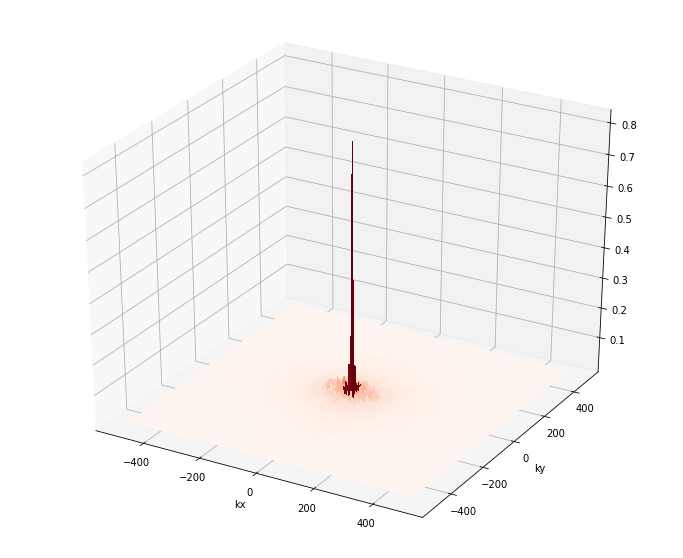

In [ ]:
# Plot of the shifted signal:
fig = plt.figure(figsize = (12,10))

ax = plt.axes(projection='3d')

surf = ax.plot_surface(freqs_X, freqs_Y, (2/norm_shifted_Ek.size)*norm_shifted_Ek, cmap = "Reds", linewidth=0, antialiased=False)

ax.set_xlabel('kx') 
ax.set_ylabel('ky')

plt.show()

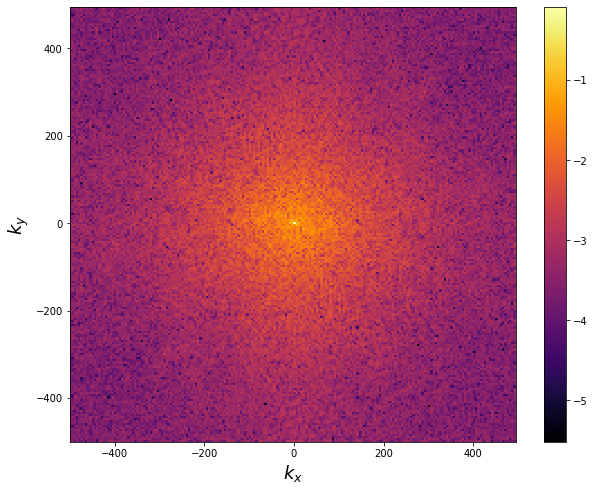

In [ ]:
plt.figure(figsize = (10,8))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10((2/norm_shifted_Ek.size)*norm_shifted_Ek), cmap = "inferno")

plt.colorbar(Z1)
plt.xlabel(r"$k_x$",fontsize=18)
plt.ylabel(r"$k_y$",fontsize=18)

plt.show()

# TASK 3: 

Use the function below to produce a 1D Fourier spectrum from the 2D Fourier image that you produced above. Make a log-log plot of the 1D Fourier spetrum. You should get a plot similar to the sketch shown here (in the "cascade of turbulence" section):

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2c_python_II_lecture.ipynb

### Note:
The GetPSD1D() function calculates the azimuthal summation and will allow you to test whether the spectrum of this turbulence snaphot follows Kolmogorov or not.





In [ ]:
from scipy import ndimage

In [ ]:
#===================================================================
# Get PSD 1D (total radial power spectrum)
#===================================================================
def GetPSD1D(psd2D):
    h  = psd2D.shape[0]
    w  = psd2D.shape[1]
    wc = w//2
    hc = h//2

    # create an array of integer radial distances from the center
    Y, X = np.ogrid[0:h, 0:w]
    r    = np.hypot(X - wc, Y - hc).astype(int)

    # SUM all psd2D pixels with label 'r' for 0<=r<=wc
    # NOTE: this will miss power contributions in 'corners' r>wc
    psd1D = ndimage.sum(psd2D, r, index=np.arange(0, wc))

    return psd1D
#===================================================================

# Taken from: https://medium.com/tangibit-studios/2d-spectrum-characterization-e288f255cc59

In [ ]:
#Total radial power spectrum
PSD1D=GetPSD1D(np.abs(shifted_fourier_Ek))

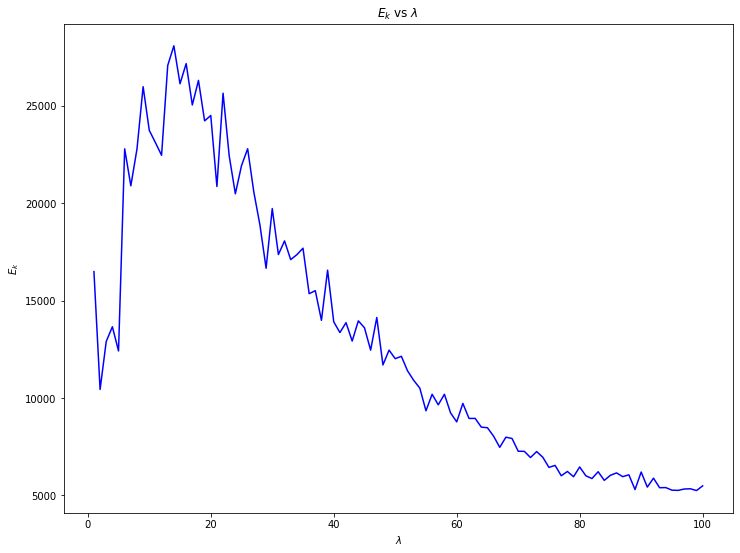

In [ ]:
import math

lambdas = np.arange(1,101)

# Make plot
fig,ax=plt.subplots(1,1, figsize=(12, 9))
ax.plot(lambdas, PSD1D, c='blue')

ax.set_title(r'$E_k$ vs $\lambda$')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$E_k$')
plt.show()

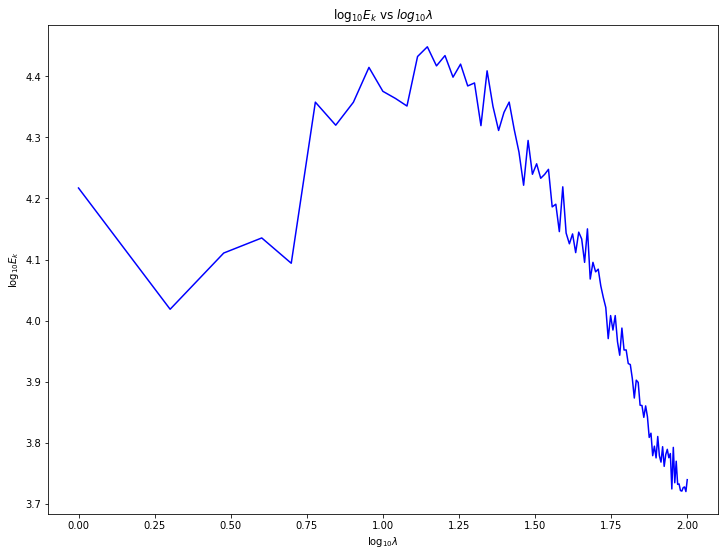

In [ ]:
#log-log plot

fig,ax=plt.subplots(1,1, figsize=(12, 9))
ax.plot(np.log10(lambdas), np.log10(PSD1D), c='blue')
ax.set_title(r'$\log_{10}{E_k}$ vs $log_{10}{\lambda}$')
ax.set_xlabel(r'$\log_{10}{\lambda}$')
ax.set_ylabel(r'$\log_{10}{E_k}$')
plt.show()

# TASK 4: 

Now that you have produced the 1D Fourier spectrum of the kinetic energy, label the plot identifying the turbulence generation, transfer, and dissipation regions. Finally, carry out a linear regression considering only the points associated with the inertial range. Does the spectrum follow Kolmogorov spectrum, $E_k \propto k^{-\frac{5}{3}}$?

### Reference:

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-1/Sesion_1_Data_analysis_with_PythonI.ipynb

In [136]:
#lest find first Ekmin and Ekmax

b= np.stack((np.log10(lambdas), np.log10(PSD1D)), axis=-1)

In [165]:
#value of kmax
np.where(y==max(np.log10(PSD1D)))

(array([13]),)

In [141]:
k1=np.log10(lambdas)[13]
print(k1)

1.146128035678238


In [142]:
#value of kmin
np.where(y==min(np.log10(PSD1D)))

(array([98]),)

In [143]:
k2=np.log10(lambdas)[98]
print(k2)

1.99563519459755


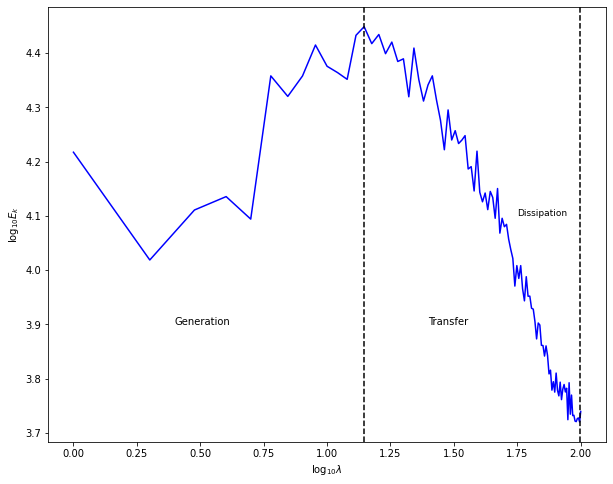

In [167]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(np.log10(lambdas), np.log10(PSD1D), c='blue')
ax.axvline(x= k1, linestyle = '--', c = 'black')
ax.axvline(x= k2, linestyle = '--', c = 'black')
plt.xlabel(r'$\log_{10}{\lambda}$')
plt.ylabel(r'$\log_{10}{E_k}$')
plt.text(0.4, 3.9, 'Generation', fontsize=10)
plt.text(1.4, 3.9, 'Transfer', fontsize=10)
plt.text(1.75, 4.1, 'Dissipation', fontsize=9)
plt.show()
